# How to visualize your injection-recovery results

At this point you either have a table of injected (and partially recovered) flares stored somewhere in a file, or you just ran `sample_flare_recovery` on your `FlareLightCurve`. In the latter case, you can skip the first part of this tutorial.

We now want to visualize how recovery of flares and their $ED$ behaves as a function of recovered or injected amplitudes and durations or FWHM, respectively.

We start out by fetching the TESS light curve of a famous flare star:

In [1]:
# This is all we need to import
from altaipony.lcio import from_mast

# This is for the notebook to show the heatmaps and figures
%matplotlib inline

/home/ekaterina/Documents/000_envs/forallpurposes/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
# If you are not familiar with this notation, go to Getting_Started.ipynb 
flc = from_mast("GJ 1243", mission="TESS", c=15)

Found cached file /home/ekaterina/.lightkurve-cache/mastDownload/TESS/tess2019226182529-s0015-0000000273589987-0151-s/tess2019226182529-s0015-0000000273589987-0151-s_lc.fits with expected size 1906560.
5% (909/18757) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
5% (909/18757) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
/home/ekaterina/Documents/000_envs/forallpurposes/lib/python3.6/site-packages/altaipony-1.0.0-py3.6.egg/altaipony/lcio.py:114: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/.lightkurve-cache/mastDownload/TESS/tess2019226182529-s0015-0000000273589987-0151-s/tess2019226182529-s0015-0000000273589987-0151-s_lc.fits' mode='rb' closefd=True>
  c)


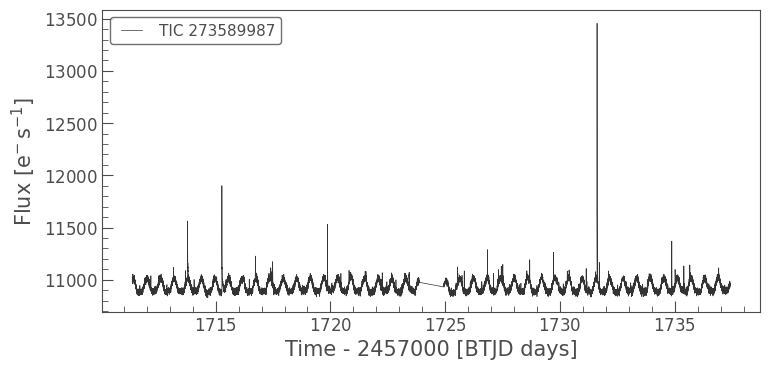

In [3]:
# That's GJ 1243 as seen by TESS
flc.plot();

In [4]:
# We can do all sorts of stuff on this, like de-trending ...
flcd = flc.detrend("savgol")

# ... searching for flares ...
flares = flcd.find_flares().flares

Found 8 candidate(s) in the (0,8944) gap.
Found 10 candidate(s) in the (8944,17848) gap.


In [5]:
# ... or sampling injection recovery
flcd, fakeflc = flcd.sample_flare_recovery(inject_before_detrending=True, mode="savgol", 
                                          iterations=5, fakefreq=0.01, ampl=[1e-4, 0.02],
                                           dur=[.001/6., 0.01/6.]
                                          )

Found 8 candidate(s) in the (0,8944) gap.
Found 10 candidate(s) in the (8944,17848) gap.
N/A%|                                                                         |
Detrending fake LC:

Found 12 candidate(s) in the (0,8944) gap.
Found 17 candidate(s) in the (8944,17848) gap.
 20%|##############                                                           |
Detrending fake LC:

Found 12 candidate(s) in the (0,8944) gap.
Found 17 candidate(s) in the (8944,17848) gap.
 40%|#############################                                            |
Detrending fake LC:

Found 12 candidate(s) in the (0,8944) gap.
Found 17 candidate(s) in the (8944,17848) gap.
 60%|###########################################                              |
Detrending fake LC:

Found 12 candidate(s) in the (0,8944) gap.
Found 17 candidate(s) in the (8944,17848) gap.
 80%|##########################################################               |
Detrending fake LC:

Found 12 candidate(s) in the (0,8944) gap.
Fou

If you ran the above cell, you already have a few synthetic flares injected and recovered, but let's add some more to fill a nice heatmap with: 

In [6]:
print("Before loading extra events: ", flcd.fake_flares.shape[0])

flcd.load_injrec_data("../altaipony/tests/testfiles/gj1243_injrec.csv")

print("After loading extra events: ", flcd.fake_flares.shape[0])

The file is appended to an existing table.


Before loading extra events:  10
After loading extra events:  1020


As you can see, we just added about a 1000 more events to `flcd.fake_flares`.

Now we can show how well $ED$ is recovered for the injected amplitude and duration range:

NumExpr defaulting to 8 threads.


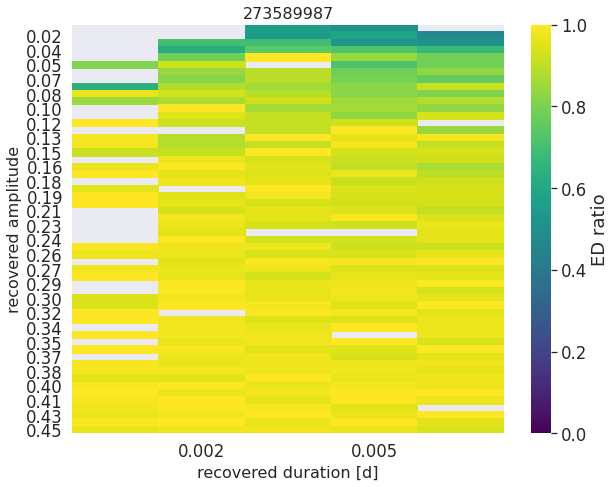

In [7]:
fig = flcd.plot_ed_ratio_heatmap(flares_per_bin=.3)

We can also look at how recovery probability fares:

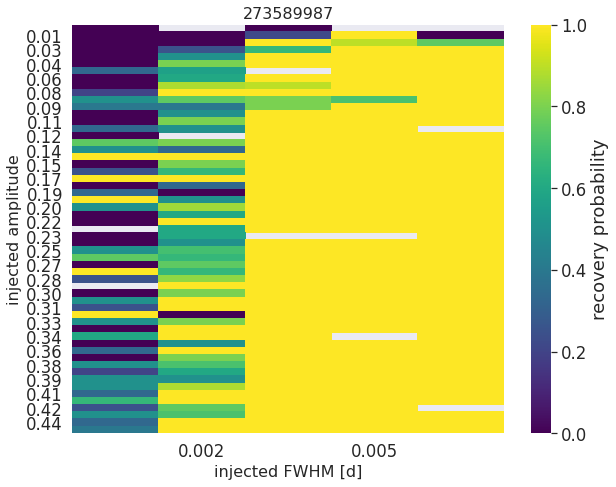

In [12]:
fig = flcd.plot_recovery_probability_heatmap(flares_per_bin=.3)

That's all, unless you want to play with the bins. The default bin size tiles the parameter space using `flares_per_bin=20`, which maps to the average number of flares per bin. But you can also pass arrays or integers for `ampl_bins=` and `dur_bins=` to be more specific:  

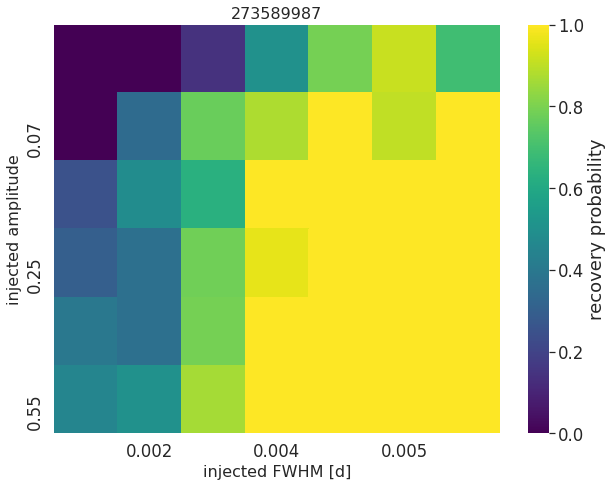

In [13]:
import numpy as np

fig = flcd.plot_recovery_probability_heatmap(ampl_bins=np.array([0, 0.04, .1, .2, .3, .4, .7],),
                                       dur_bins=np.linspace(0.,0.01,11),)

Note that the tile sizes do not reflect the bin sizes.

Questions? Ideas? Email Ekaterina at: eilin@aip.de

# Appendix: Access the tiled data

If you wish to manipulate the intermediate product you can use the tiled up `DataFrame`:

In [11]:
from altaipony.injrecanalysis import tile_up_injection_recovery

# Use "ed_ratio" instead of  "recovery_probability" to access the other table
dff, val = tile_up_injection_recovery(flcd.fake_flares, "recovery_probability", 
                                      ampl_bins=np.linspace(0,.1,5),
                                      dur_bins=np.linspace(0,.01,5))

dff

rec  count
Amplitude     Duration                        
(0.0, 0.025]  (0.0, 0.0025]    0.000000     18
              (0.0025, 0.005]  0.473684     19
              (0.005, 0.0075]  0.687500     16
              (0.0075, 0.01]        NaN      0
(0.025, 0.05] (0.0, 0.0025]    0.125000     16
              (0.0025, 0.005]  0.894737     19
              (0.005, 0.0075]  1.000000     19
              (0.0075, 0.01]        NaN      0
(0.05, 0.075] (0.0, 0.0025]    0.272727     22
              (0.0025, 0.005]  0.923077     26
              (0.005, 0.0075]  1.000000     18
              (0.0075, 0.01]        NaN      0
(0.075, 0.1]  (0.0, 0.0025]    0.450000     20
              (0.0025, 0.005]  0.875000     24
              (0.005, 0.0075]  0.882353     17
              (0.0075, 0.01]        NaN      0

"rec" is the recovery probability, "edrat" the $ED$ ratio, and "count" gives you the number of events in each bin that is defined by "Amplitude" and "Duration".